# 資料清理

In [1]:
import yfinance as yf
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.momentum import StochasticOscillator

# 獲取台積電股票的歷史數據
df = yf.Ticker("2303.TW").history(period="max")

# 計算技術指標
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")

df.info()


C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5749 entries, 2000-01-04 00:00:00+08:00 to 2023-06-02 00:00:00+08:00
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       5749 non-null   float64
 1   High                       5749 non-null   float64
 2   Low                        5749 non-null   float64
 3   Close                      5749 non-null   float64
 4   Volume                     5749 non-null   int64  
 5   Dividends                  5749 non-null   float64
 6   Stock Splits               5749 non-null   float64
 7   volume_adi                 5748 non-null   float64
 8   volume_obv                 5749 non-null   int64  
 9   volume_cmf                 5710 non-null   float64
 10  volume_fi                  5736 non-null   float64
 11  volume_em                  5720 non-null   float64
 12  volume_sma_em              5551 non-null   float64
 13  

In [2]:
# 選擇要保留的指標
selected_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']

# 刪除其他指標
df = df[selected_columns]

# 打印結果
print(df)

                                Open       High        Low      Close   
Date                                                                    
2000-01-04 00:00:00+08:00  22.350721  22.828299  21.968656  22.637268  \
2000-01-05 00:00:00+08:00  22.159685  22.637264  21.968652  22.541750   
2000-01-06 00:00:00+08:00  22.541747  22.541747  21.968649  22.064167   
2000-01-07 00:00:00+08:00  21.491070  21.682103  20.822459  21.395555   
2000-01-10 00:00:00+08:00  20.440397  22.159682  20.440397  21.968649   
...                              ...        ...        ...        ...   
2023-05-29 00:00:00+08:00  52.299999  52.799999  51.099998  51.200001   
2023-05-30 00:00:00+08:00  51.200001  51.799999  50.599998  51.599998   
2023-05-31 00:00:00+08:00  51.400002  51.799999  51.099998  51.799999   
2023-06-01 00:00:00+08:00  51.299999  51.299999  50.299999  50.799999   
2023-06-02 00:00:00+08:00  51.000000  51.400002  50.599998  51.299999   

                              Volume  trend_macd_d

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5749 entries, 2000-01-04 00:00:00+08:00 to 2023-06-02 00:00:00+08:00
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             5749 non-null   float64
 1   High             5749 non-null   float64
 2   Low              5749 non-null   float64
 3   Close            5749 non-null   float64
 4   Volume           5749 non-null   int64  
 5   trend_macd_diff  5716 non-null   float64
 6   trend_ema_fast   5738 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 359.3 KB


In [4]:
# 將索引視為日期欄位
df['Date'] = df.index

# 將"Date"欄位移至第一欄
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']]


# 計算KD值
KD = ta.momentum.StochasticOscillator(
    close=df['Close'],
    high=df['High'],
    low=df['Low'],
    window=14,
    smooth_window=3,
    fillna=False
)
df['KD'] = KD.stoch()  # 取得KD值的陣列

# 使用ta套件中的RSIIndicator指標計算RSI值
rsi = ta.momentum.RSIIndicator(
    close=df['Close'],
    window=14,
    fillna=False
).rsi()

# 將計算出的RSI值合併到原始DataFrame中
df['RSI'] = rsi

# 過濾出2022年到2023年2月的資料
start_date = '2022-01-01'
end_date = '2023-02-28'
dfmodel = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]




df = df.round(3) 

df = df.reset_index(drop=True)

print(dfmodel)

                                               Date       Open       High   
Date                                                                        
2022-01-03 00:00:00+08:00 2022-01-03 00:00:00+08:00  61.232451  61.514198  \
2022-01-04 00:00:00+08:00 2022-01-04 00:00:00+08:00  59.635902  60.105477   
2022-01-05 00:00:00+08:00 2022-01-05 00:00:00+08:00  59.166329  60.105477   
2022-01-06 00:00:00+08:00 2022-01-06 00:00:00+08:00  58.696756  59.072417   
2022-01-07 00:00:00+08:00 2022-01-07 00:00:00+08:00  59.823734  59.823734   
...                                             ...        ...        ...   
2023-02-20 00:00:00+08:00 2023-02-20 00:00:00+08:00  50.000000  50.799999   
2023-02-21 00:00:00+08:00 2023-02-21 00:00:00+08:00  50.400002  50.700001   
2023-02-22 00:00:00+08:00 2023-02-22 00:00:00+08:00  49.500000  49.799999   
2023-02-23 00:00:00+08:00 2023-02-23 00:00:00+08:00  49.900002  50.500000   
2023-02-24 00:00:00+08:00 2023-02-24 00:00:00+08:00  50.700001  50.799999   

In [5]:
dfmodel.tail(60)

,Date,Open,High,Low,Close,Volume,trend_macd_diff,trend_ema_fast,KD,RSI
Date,,,,,,,,,,
2022-11-22 00:00:00+08:00,2022-11-22 00:00:00+08:00,45.549999,46.150002,45.250000,46.099998,65457989,0.453286,44.099277,88.235294,71.447822
2022-11-23 00:00:00+08:00,2022-11-23 00:00:00+08:00,46.349998,46.500000,46.099998,46.099998,45884654,0.374260,44.407080,88.235294,71.447822
2022-11-24 00:00:00+08:00,2022-11-24 00:00:00+08:00,46.400002,46.500000,45.599998,46.200001,38914337,0.296916,44.682914,88.157922,71.770033
2022-11-25 00:00:00+08:00,2022-11-25 00:00:00+08:00,46.049999,46.150002,45.700001,45.799999,33819940,0.192095,44.854773,82.191789,68.442926
2022-11-28 00:00:00+08:00,2022-11-28 00:00:00+08:00,44.599998,44.950001,44.200001,44.400002,78357139,0.011292,44.784808,57.480353,58.262556
2022-11-29 00:00:00+08:00,2022-11-29 00:00:00+08:00,44.049999,44.750000,43.650002,44.650002,58090600,-0.102384,44.764069,60.483901,59.423229
2022-11-30 00:00:00+08:00,2022-11-30 00:00:00+08:00,44.349998,45.799999,44.150002,45.799999,61750227,-0.110358,44.923443,62.318829,64.336290
2022-12-01 00:00:00+08:00,2022-12-01 00:00:00+08:00,46.500000,46.650002,45.599998,45.599998,73822944,-0.137564,45.027528,56.521701,62.909660
2022-12-02 00:00:00+08:00,2022-12-02 00:00:00+08:00,44.799999,45.650002,44.799999,45.500000,54160843,-0.168703,45.100216,53.623192,62.167386


# 模型建構

### SVR

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta

# SVR
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]
C_values = [0.1, 1.0, 10.0]
epsilon_values = [0.1, 0.2, 0.5]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for C in C_values:
        for epsilon in epsilon_values:
            model = SVR(C=C, epsilon=epsilon)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((C, epsilon, avg_score))
    
    # 選擇最佳參數
    best_C, best_epsilon, _ = min(scores, key=lambda x: x[2])
    
    model = SVR(C=best_C, epsilon=best_epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.1
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'C': best_C, 'epsilon': best_epsilon}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_SVR = SVR(C=best_params['C'], epsilon=best_params['epsilon'])
model_SVR.fit(X, y)


最佳参数: {'ratio': 20, 'C': 0.1, 'epsilon': 0.5}
最佳相对误差: 0.0 %


SVR(C=0.1, epsilon=0.5)

In [7]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_SVR = model_SVR.predict(input_data)

# 印出預測結果
print(predictions_SVR)

[42.65962141 42.5103486  42.62210749 42.53186277 42.49988328 42.47794751
 42.67361689 42.58914159 42.60577663 42.65652195 42.57086041 42.49331223
 42.50690469 42.66099787 42.66738824 42.57674404 42.44730213 42.57375362
 42.54731349 42.49785148 42.72859675 42.6912772  42.68135741 42.5832875
 42.56168164 42.47841834 42.43871881 42.43947207 42.55802235 42.47580382
 42.46797133 42.48177524 42.44015735 42.46015539 42.57429472 42.79970993
 42.71773633 42.63249593 42.58918047 42.63654557 42.63252057 42.81430867
 43.12062375 42.86548879 42.78463729 42.78212886 42.61112891 42.6125506
 42.57406936 42.71885795 42.57240361 42.60830663 42.59152915 42.49608023
 42.57051979 42.5805773  42.49466939 42.53639834 42.45816103 42.55880565
 42.64048155 42.61487486]


In [8]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_SVR = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_SVR = selected_data_SVR[['Date']]

selected_data_SVR['predictions_SVR'] = predictions_SVR

# 打印结果
print(selected_data_SVR)




                          Date  predictions_SVR
5685 2023-03-01 00:00:00+08:00        42.659621
5686 2023-03-02 00:00:00+08:00        42.510349
5687 2023-03-03 00:00:00+08:00        42.622107
5688 2023-03-06 00:00:00+08:00        42.531863
5689 2023-03-07 00:00:00+08:00        42.499883
...                        ...              ...
5742 2023-05-25 00:00:00+08:00        42.536398
5743 2023-05-26 00:00:00+08:00        42.458161
5744 2023-05-29 00:00:00+08:00        42.558806
5745 2023-05-30 00:00:00+08:00        42.640482
5746 2023-05-31 00:00:00+08:00        42.614875

[62 rows x 2 columns]


In [9]:
# 找到最低值和最高值的索引
min_index = selected_data_SVR['predictions_SVR'].idxmin()
max_index = selected_data_SVR['predictions_SVR'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_SVR.loc[min_index, 'Date']
max_date = selected_data_SVR.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_SVR.loc[min_index, 'predictions_SVR']
max_value = selected_data_SVR.loc[max_index, 'predictions_SVR']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-04-11 00:00:00+08:00
最低值： 42.43871881156152
最高值日期： 2023-05-04 00:00:00+08:00
最高值： 43.12062375140509


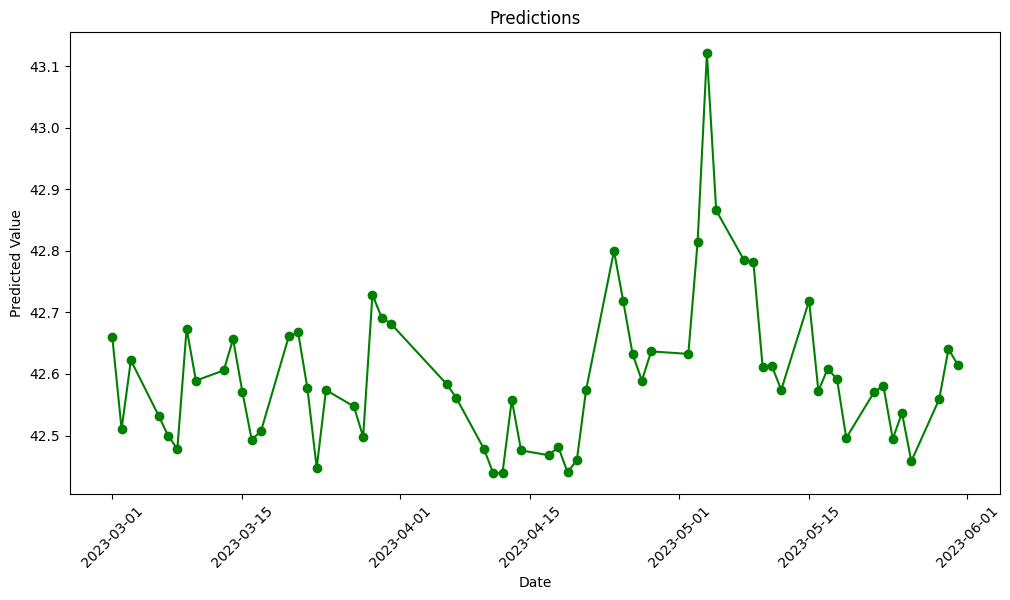

In [10]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()

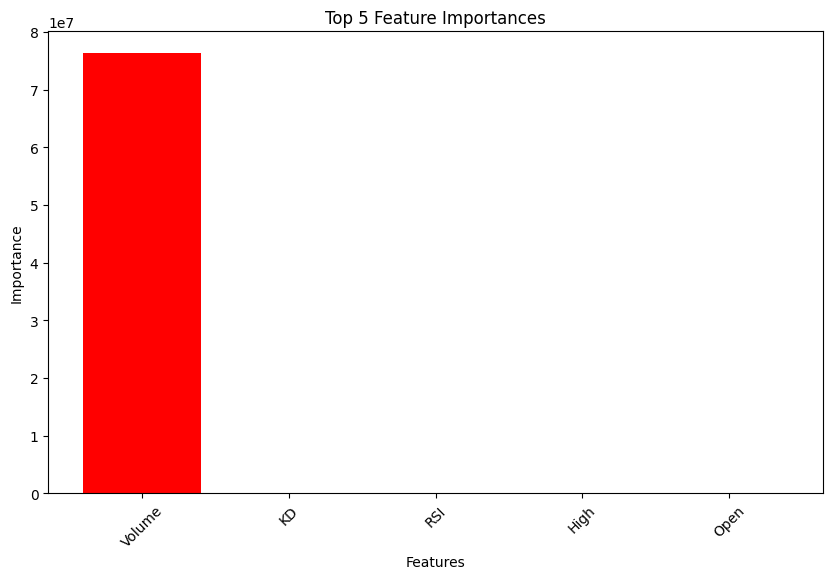

In [11]:
# 獲取支持向量（SV）的索引
support_vector_indices = model_SVR.support_

# 獲取支持向量對應的特徵
support_vectors = X.iloc[support_vector_indices]

# 計算支持向量的平均值作為特徵重要性
feature_importances = support_vectors.mean()

# 將特徵重要性排序
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# 取前N個重要特徵
top_n = 5
top_features = feature_importances_sorted.index[:top_n]
top_importances = feature_importances_sorted.values[:top_n]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


### randomforest

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import datetime
from dateutil.relativedelta import relativedelta

# Random Forest
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(5, 100, 5)]
n_estimator_values = [i for i in range(100, 250, 50)]
max_depth_values = [i for i in range(1, 5)]
min_samples_leaf_values = [i for i in range(1, 5)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    for max_depth in max_depth_values:
        for min_samples_leaf in min_samples_leaf_values:
            for n_estimators in n_estimator_values:
                model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=2023)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                average_value = np.mean(y_test)
                relative_error = (mse / average_value) * 100
                if relative_error < best_relative_error:
                    best_relative_error = relative_error
                    best_params = {'ratio': ratio, 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error,'%')

# 將模型命名為 model
model_RF = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                              max_depth=best_params['max_depth'],
                              min_samples_leaf=best_params['min_samples_leaf'],
                              random_state=2023)
model_RF.fit(X, y)




最佳参数: {'ratio': 95, 'n_estimators': 150, 'max_depth': 4, 'min_samples_leaf': 1}
最佳相对误差: 0.15937444677010043 %


RandomForestRegressor(max_depth=4, n_estimators=150, random_state=2023)

In [13]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-15':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_RF = model_RF.predict(input_data)

# 印出預測結果
print(predictions_RF)

[45.59740278 45.60514795 46.10501533 46.11241661 46.16143083 45.73686748
 44.51246368 44.70642509 45.73686748 45.59740278 45.58599988 45.49341152
 44.52647382 43.84544562 42.70432668 43.70698841 43.70160253 43.84233826
 44.51309126 44.29082382 44.33231059 42.86241411 41.80492609 41.82010588
 42.77636842 41.82010588 41.81030609 41.80492609 40.84467918 40.82872095
 40.84467918 41.48157347 40.95125459 41.24598286 42.61929441 44.52080289
 44.87264715 45.12463247 45.12463247 45.49341152 44.82908816 45.91197289
 48.77710167 48.81593561 49.16011328 50.38182628 50.08895962 49.12561627
 49.02298893 50.43425912 50.43425912 50.43639125 49.76705976 50.43575635
 50.02173562 50.07266352 49.93516004 50.42353359 50.43328014 49.71294476
 50.15041277 50.01513864]


In [14]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_RF = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_RF = selected_data_RF[['Date']]

selected_data_RF['predictions_RF'] = predictions_RF

# 打印结果
print(selected_data_RF)


                          Date  predictions_RF
5685 2023-03-01 00:00:00+08:00       45.597403
5686 2023-03-02 00:00:00+08:00       45.605148
5687 2023-03-03 00:00:00+08:00       46.105015
5688 2023-03-06 00:00:00+08:00       46.112417
5689 2023-03-07 00:00:00+08:00       46.161431
...                        ...             ...
5742 2023-05-25 00:00:00+08:00       50.423534
5743 2023-05-26 00:00:00+08:00       50.433280
5744 2023-05-29 00:00:00+08:00       49.712945
5745 2023-05-30 00:00:00+08:00       50.150413
5746 2023-05-31 00:00:00+08:00       50.015139

[62 rows x 2 columns]


In [15]:
# 找到最低值和最高值的索引
min_index = selected_data_RF['predictions_RF'].idxmin()
max_index = selected_data_RF['predictions_RF'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_RF.loc[min_index, 'Date']
max_date = selected_data_RF.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_RF.loc[min_index, 'predictions_RF']
max_value = selected_data_RF.loc[max_index, 'predictions_RF']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)

最低值日期： 2023-04-14 00:00:00+08:00
最低值： 40.82872094705085
最高值日期： 2023-05-17 00:00:00+08:00
最高值： 50.43639124717893


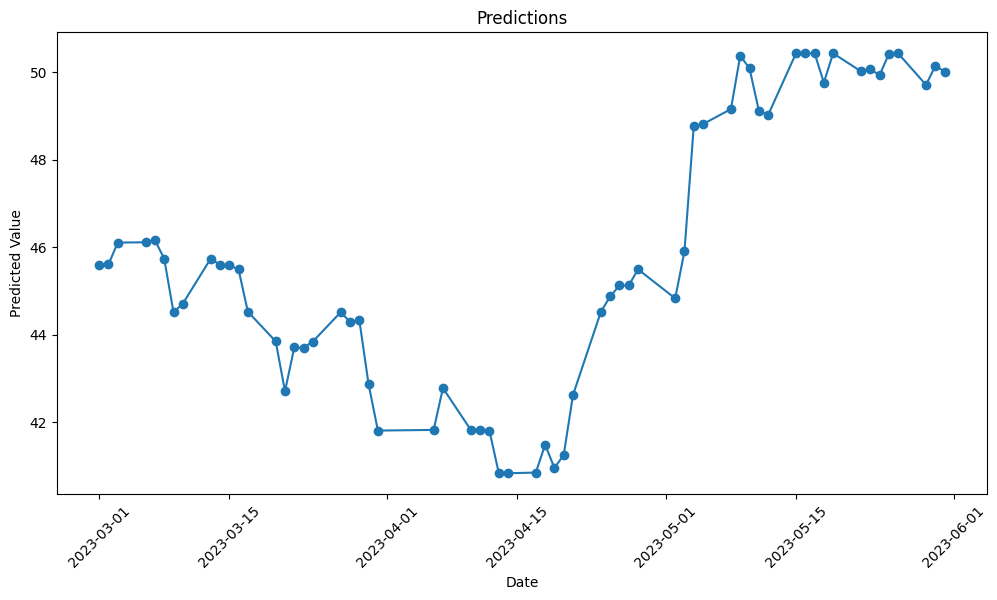

In [16]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



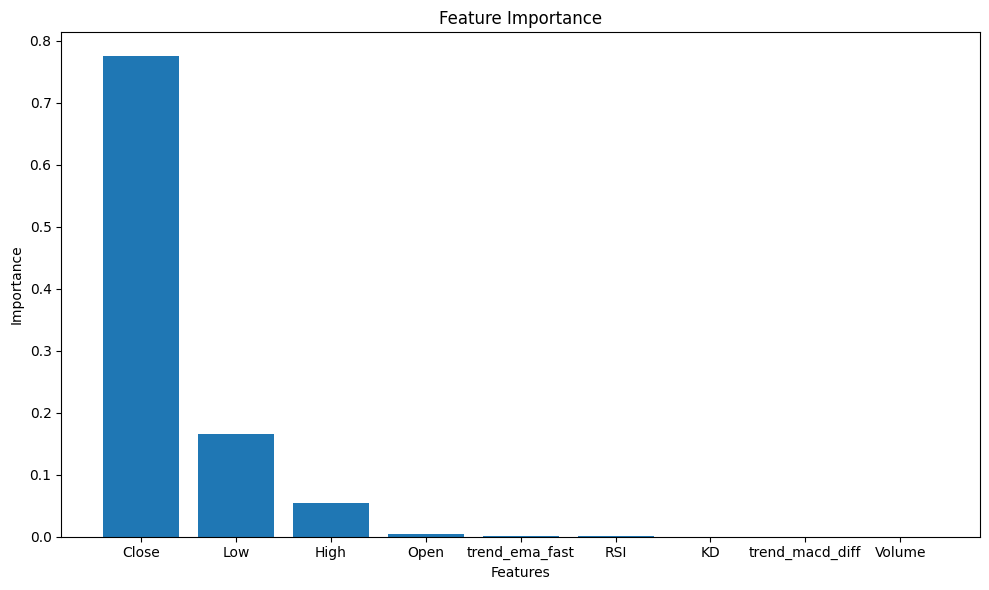

In [17]:
#看那些特徵比較重要，然後輸出前n重要的特徵

feature_importances = model_RF.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# 繪製長條圖
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names,)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### XGBoost

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta


# XGBoost
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for max_depth in range(3, 7):
        for learning_rate in [0.1, 0.01]:
            model = xgb.XGBRegressor(max_depth=max_depth, learning_rate=learning_rate)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((max_depth, learning_rate, avg_score))
    
    # 選擇最佳參數
    best_max_depth, best_learning_rate, _ = min(scores, key=lambda x: x[2])
    
    model = xgb.XGBRegressor(max_depth=best_max_depth, learning_rate=best_learning_rate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.00001
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'max_depth': best_max_depth, 'learning_rate': best_learning_rate}

print("最佳參數:", best_params)
print("最佳相對誤差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_XG = xgb.XGBRegressor(max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'])
model_XG.fit(X, y)

最佳參數: {'ratio': 20, 'max_depth': 3, 'learning_rate': 0.01}
最佳相對誤差: 0.0 %


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_XG = model_XG.predict(input_data)

# 印出預測結果
print(predictions_XG)

[29.264563 29.264563 29.522554 29.522554 29.555214 29.379354 28.556046
 28.718006 29.379354 29.264563 29.264563 29.188057 28.588406 27.893469
 26.959335 27.786068 27.786068 28.04556  28.556046 28.429035 28.467064
 27.343372 26.476559 26.560429 27.25668  26.510235 26.476559 26.476559
 25.675213 25.675213 25.635298 26.122404 25.88403  26.024729 26.896498
 28.588406 28.923021 29.034374 29.034374 29.188057 28.882711 29.455654
 29.71902  29.71902  29.71902  29.71902  29.71902  29.71902  29.71902
 29.71902  29.71902  29.71902  29.71902  29.71902  29.71902  29.71902
 29.71902  29.71902  29.71902  29.71902  29.71902  29.71902 ]


In [20]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_XG = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_XG = selected_data_XG[['Date']]

selected_data_XG['predictions_XG'] = predictions_XG

# 打印结果
print(selected_data_XG)




                          Date  predictions_XG
5685 2023-03-01 00:00:00+08:00       29.264563
5686 2023-03-02 00:00:00+08:00       29.264563
5687 2023-03-03 00:00:00+08:00       29.522554
5688 2023-03-06 00:00:00+08:00       29.522554
5689 2023-03-07 00:00:00+08:00       29.555214
...                        ...             ...
5742 2023-05-25 00:00:00+08:00       29.719021
5743 2023-05-26 00:00:00+08:00       29.719021
5744 2023-05-29 00:00:00+08:00       29.719021
5745 2023-05-30 00:00:00+08:00       29.719021
5746 2023-05-31 00:00:00+08:00       29.719021

[62 rows x 2 columns]


In [21]:
# 找到最低值和最高值的索引
min_index = selected_data_XG['predictions_XG'].idxmin()
max_index = selected_data_XG['predictions_XG'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_XG.loc[min_index, 'Date']
max_date = selected_data_XG.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_XG.loc[min_index, 'predictions_XG']
max_value = selected_data_XG.loc[max_index, 'predictions_XG']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-04-17 00:00:00+08:00
最低值： 25.635298
最高值日期： 2023-05-04 00:00:00+08:00
最高值： 29.71902


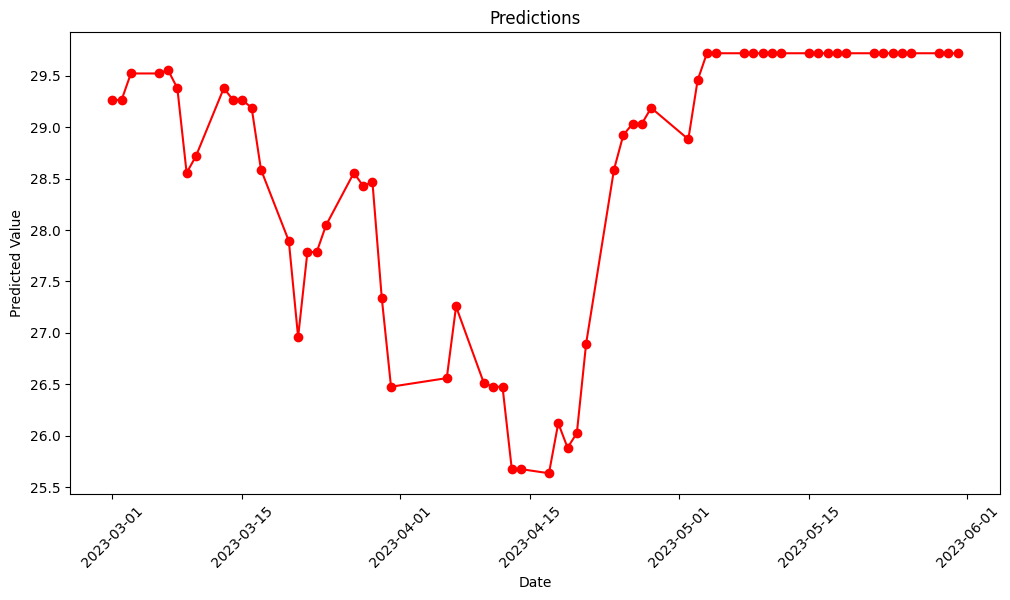

In [22]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



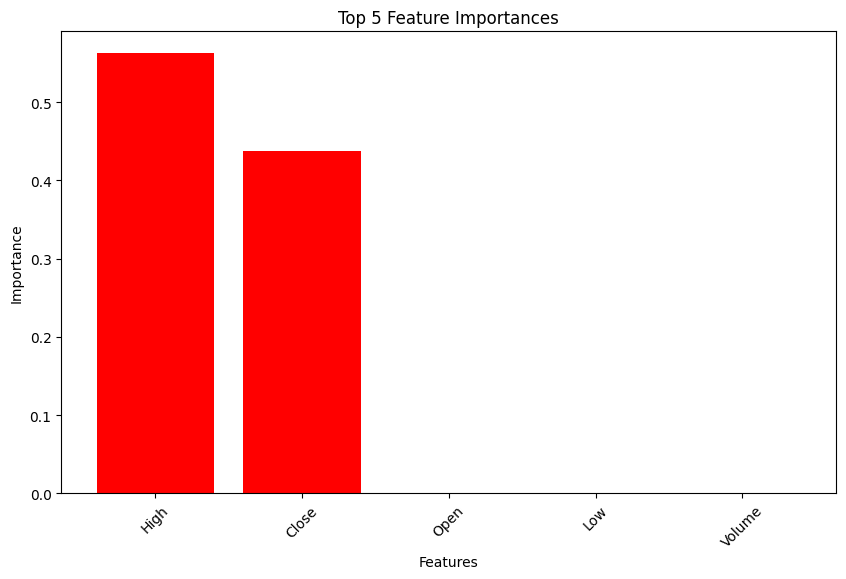

In [23]:
# 獲取特徵重要性
feature_importances = model_XG.feature_importances_

# 獲取特徵名稱
feature_names = X.columns

# 將特徵重要性與特徵名稱進行配對並排序
feature_importances_sorted = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# 取前N個重要特徵
top_n = 5
top_features = [f for f, _ in feature_importances_sorted[:top_n]]
top_importances = [imp for _, imp in feature_importances_sorted[:top_n]]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


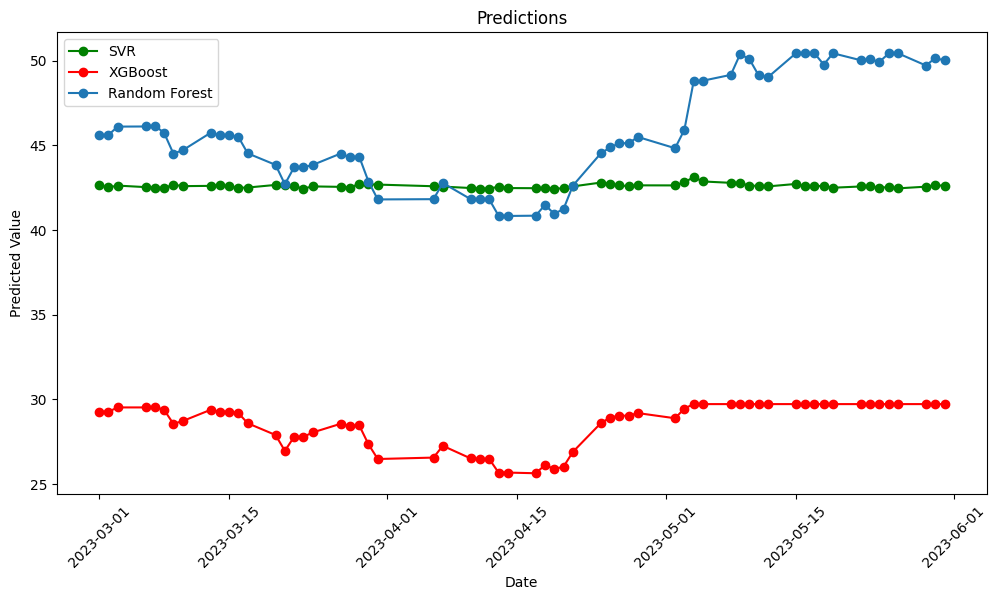

In [24]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green', label='SVR')
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red', label='XGBoost')
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o', label='Random Forest')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置图例
plt.legend()

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()
